In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Acquire data**
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.



In [2]:
df_train = pd.read_csv("../input/titanic/train.csv")
df_test = pd.read_csv("../input/titanic/test.csv")

In [3]:
titanic_data = [df_train , df_test]
titanic_data = pd.concat(titanic_data)

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(titanic_data['Embarked'].unique())
print(titanic_data['Parch'].unique())
print(titanic_data['SibSp'].unique())
print(titanic_data['Pclass'].unique())

['S' 'C' 'Q' nan]
[0 1 2 5 3 4 6 9]
[1 0 3 4 2 5 8]
[3 1 2]


In [6]:
titanic_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
#Find the null value in dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **Relationship between Features and Survival**
In this section, we analyze relationship between different features with respect to Survival. We see how different feature values show different survival chance. We also plot different kinds of diagrams to visualize our data and findings.

In [9]:
#Pclass Vs Survived
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

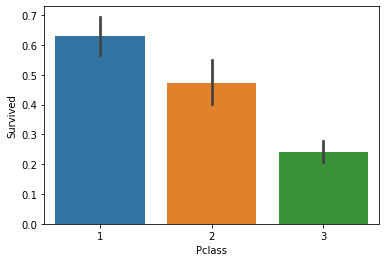

In [12]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

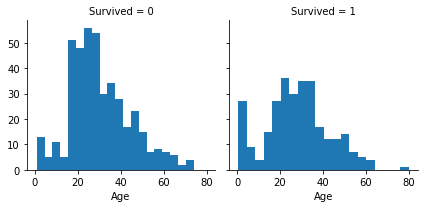

In [13]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


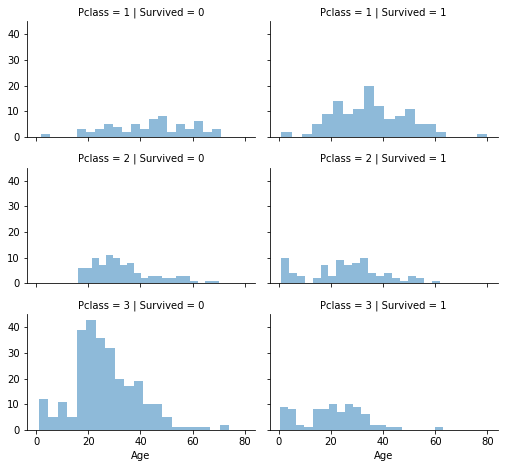

In [14]:
#Comparsion Survived,Pclass with the Age
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [15]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

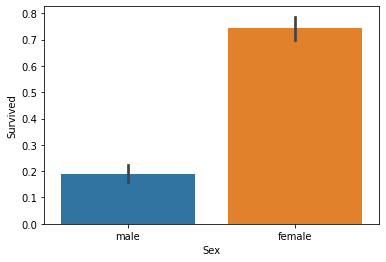

In [18]:
sns.barplot(x='Sex',y='Survived',data=df_train)

In [19]:
tab = pd.crosstab(df_train['Pclass'], df_train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


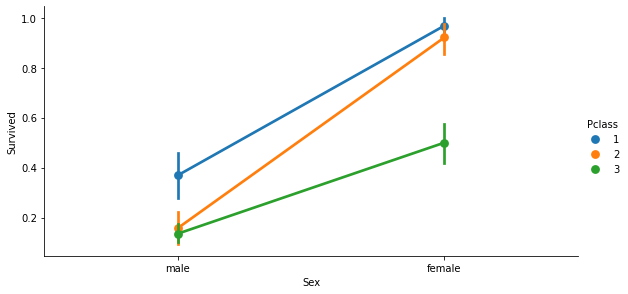

In [20]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=df_train)

# From the above plot:

Women from 1st and 2nd Pclass have almost 100% survival chance.
Men from 2nd and 3rd Pclass have only around 10% survival chance.

In [21]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df_train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [23]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

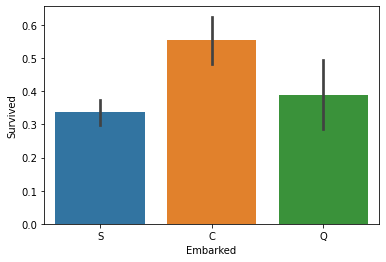

In [24]:
sns.barplot(x='Embarked',y='Survived',data=df_train)

In [25]:
df_train.groupby(['Embarked','Pclass','Survived']).Sex.value_counts()

Embarked  Pclass  Survived  Sex   
C         1       0         male       25
                            female      1
                  1         female     42
                            male       17
          2       0         male        8
                  1         female      7
                            male        2
          3       0         male       33
                            female      8
                  1         female     15
                            male       10
Q         1       0         male        1
                  1         female      1
          2       0         male        1
                  1         female      2
          3       0         male       36
                            female      9
                  1         female     24
                            male        3
S         1       0         male       51
                            female      2
                  1         female     46
                            male       28

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

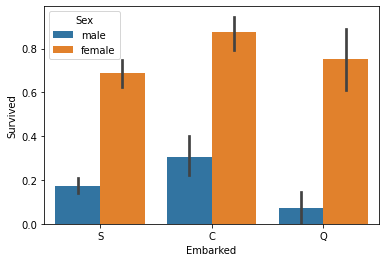

In [26]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=df_train)

In [27]:
df_train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
df_train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [29]:
df_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

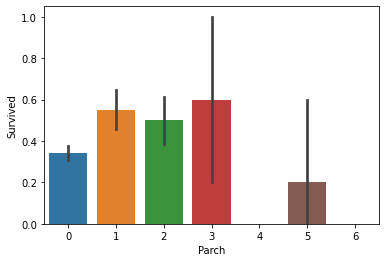

In [30]:
sns.barplot(x='Parch',y='Survived',data=df_train)

In [31]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [32]:
df_train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [33]:
df_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

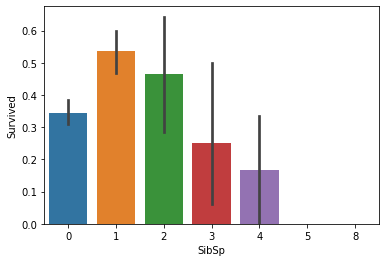

In [34]:
sns.barplot(x='SibSp',y='Survived',data=df_train)

<AxesSubplot:>

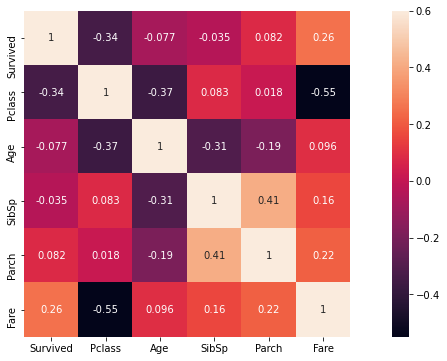

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)


In [36]:
train_test_data = [df_train, df_test]
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [38]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [39]:
for dataset in train_test_data:
    
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [40]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [41]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# **Converting a categorical feature**
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.



In [42]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [44]:
df_train = df_train.drop(['Name', 'PassengerId','Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

In [45]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [46]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


In [47]:
df_train.Embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [48]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [50]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [51]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [52]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1.0
1,1,1,1,38.0,1,0,71.2833,1,3.0
2,1,3,1,26.0,0,0,7.9250,0,2.0
3,1,1,1,35.0,1,0,53.1000,0,3.0
4,0,3,0,35.0,0,0,8.0500,0,1.0


# HANDLE MISSING VALUE
Age Feature
We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).
We then create a new column named AgeBand. This categorizes age into 5 different age range.

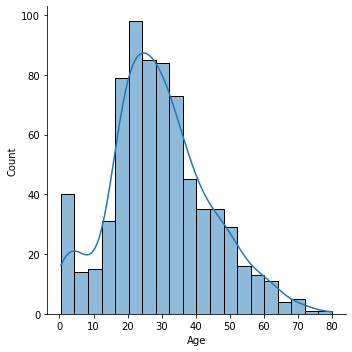

In [53]:
sns.displot(df_train['Age'],kde = True)

In [54]:
df_train['Age'].mean()

29.69911764705882

In [55]:
for dataset in combine:
    age_mean = dataset['Age'].mean()
    age_std =  dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_mean- age_std, age_mean + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
df_train['Age'].isnull().sum()

0

In [57]:
df_train['AgeBin'] = pd.cut(df_train['Age'], 5)


In [58]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,0,3,0,22,1,0,7.2500,0,1.0,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,1,3.0,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,0,2.0,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,0,3.0,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,0,1.0,"(32.0, 48.0]"


In [59]:
print (df_train[['AgeBin', 'Survived']].groupby(['AgeBin'], as_index=False).mean())

          AgeBin  Survived
0  (-0.08, 16.0]  0.523364
1   (16.0, 32.0]  0.355353
2   (32.0, 48.0]  0.373585
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [60]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [61]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,0,3,0,1,1,0,7.2500,0,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1.0,"(32.0, 48.0]"


In [62]:
df_train['Fare'].isnull().sum()

0

In [63]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())

In [64]:
df_train['FareBin'] = pd.qcut(df_train['Fare'], 4)
print (df_train[['FareBin', 'Survived']].groupby(['FareBin'], as_index=False).mean())

           FareBin  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [65]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin
0,0,3,0,1,1,0,7.2500,0,1.0,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,1,0,71.2833,1,3.0,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,0,0,7.9250,0,2.0,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,1,0,53.1000,0,3.0,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,0,0,8.0500,0,1.0,"(32.0, 48.0]","(7.91, 14.454]"


In [66]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [67]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin
0,0,3,0,1,1,0,0,0,1.0,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,1,2,1,0,3,1,3.0,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,1,1,0,0,1,0,2.0,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,1,2,1,0,3,0,3.0,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,0,2,0,0,1,0,1.0,"(32.0, 48.0]","(7.91, 14.454]"


In [68]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1


In [69]:
print (df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())


   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


About data shows that:

Having FamilySize upto 4 (from 2 to 4) has better survival chance.
FamilySize = 1, i.e. travelling alone has less survival chance.
Large FamilySize (size of 5 and above) also have less survival chance.
Let's create a new feature named IsAlone. This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.

In [70]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [71]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin,FareBin,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1.0,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,1,1,1,2,1,0,3,1,3.0,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,1,3,1,1,0,0,1,0,2.0,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,1,1,1,2,1,0,3,0,3.0,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,0,3,0,2,0,0,1,0,1.0,"(32.0, 48.0]","(7.91, 14.454]",1,1
5,0,3,0,2,0,0,1,2,1.0,"(32.0, 48.0]","(7.91, 14.454]",1,1
6,0,1,0,3,0,0,3,0,1.0,"(48.0, 64.0]","(31.0, 512.329]",1,1
7,0,3,0,0,3,1,2,0,4.0,"(-0.08, 16.0]","(14.454, 31.0]",5,0
8,1,3,1,1,0,2,1,0,3.0,"(16.0, 32.0]","(7.91, 14.454]",3,0
9,1,2,1,0,1,0,2,1,3.0,"(-0.08, 16.0]","(14.454, 31.0]",2,0


In [72]:
features_drop = ['SibSp', 'Parch','FamilySize']

In [73]:
df_train = df_train.drop(features_drop, axis=1)
df_test = df_test.drop(features_drop, axis=1)

In [74]:
df_train = df_train.drop(['AgeBin', 'FareBin'], axis=1)

In [75]:
df_train.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1.0,0
1,1,1,1,2,3,1,3.0,0
2,1,3,1,1,1,0,2.0,1
3,1,1,1,2,3,0,3.0,0
4,0,3,0,2,1,0,1.0,1
5,0,3,0,2,1,2,1.0,1
6,0,1,0,3,3,0,1.0,1
7,0,3,0,0,2,0,4.0,0
8,1,3,1,1,1,0,3.0,0
9,1,2,1,0,2,1,3.0,0


In [76]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1.0,1
1,893,3,1,2,0,0,3.0,0
2,894,2,0,3,1,2,1.0,1
3,895,3,0,1,1,0,1.0,1
4,896,3,1,1,1,0,3.0,0


In [77]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

86.87


# ActualPositiveActualNegativePredictedPositiveTPFPPredictedNegativeFNTN 
In our (Titanic problem) case:

True Positive: The classifier predicted Survived and the passenger actually Survived.

True Negative: The classifier predicted Not Survived and the passenger actually Not Survived.

False Postiive: The classifier predicted Survived but the passenger actually Not Survived.

False Negative: The classifier predicted Not Survived but the passenger actually Survived.

Accuracy: 86 % 

Confusion Matrix in Numbers
[[508  41]
 [ 76 266]]
Confusion Matrix in Percentage
[[0.93 0.07]
 [0.22 0.78]]



<AxesSubplot:>

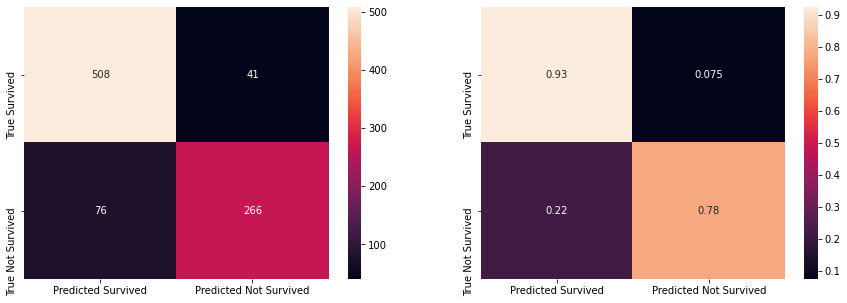

In [80]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [81]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred_random_forest
    })

submission.to_csv('submission.csv', index=False)